In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

#Варіант без застосування моделі виділення ділянки номерного знаку

DZI7 YXR


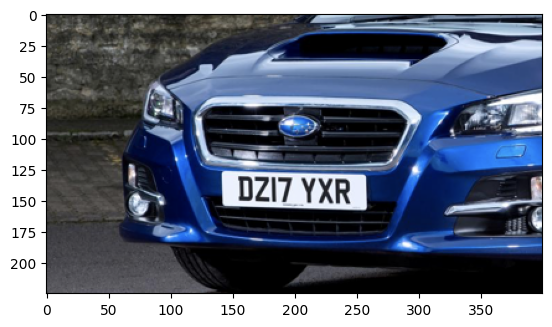

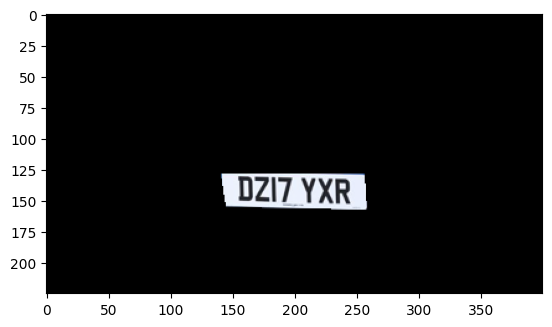

In [5]:
import cv2
import numpy as np
import imutils
import easyocr
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/car-plate-detection/images/Cars3.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_filter = cv2.bilateralFilter(gray, 11, 15, 15)
edges = cv2.Canny(img_filter, 30, 200)

cont = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont = imutils.grab_contours(cont)
cont = sorted(cont, key=cv2.contourArea, reverse=True)

pos = None
for c in cont:
    approx = cv2.approxPolyDP(c, 10, True)

    if len(approx) == 4:
        pos = approx
        break

mask = np.zeros(gray.shape, np.uint8)
new_img = cv2.drawContours(mask, [pos], 0, 255, -1)
bitwise_img = cv2.bitwise_and(img, img, mask=mask)

(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
crop = gray[x1:x2, y1:y2]

text = easyocr.Reader(["en"])
text = text.readtext(crop)
print(text[0][-2])
res = text
# final_image = cv2.putText(
#     img, res, (x1 - 200, y2 + 160), cv2.FONT_HERSHEY_PLAIN, 3, (0, 0, 255), 2
# )
# final_image = cv2.rectangle(img, (x1, x2), (y1, y2), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(bitwise_img, cv2.COLOR_BGR2RGB))
plt.show()

#Варіант із застосуванням моделі виділення ділянки номерного знаку


[[129 115 149  50]]
[([[67, 39], [363, 39], [363, 126], [67, 126]], 'DZI7 YXR', 0.9412941151936888)]
DZI7 YXR


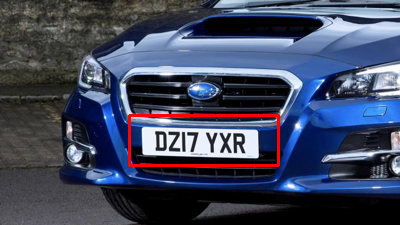

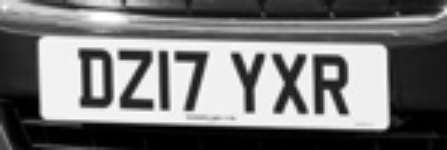

In [6]:
import cv2
import numpy as np
import imutils
import easyocr
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#model_path = '/content/drive/MyDrive/Colab Notebooks/license_plate.xml'
model_path = '/content/drive/MyDrive/Colab Notebooks/haarcascade_plate_number.xml'
model = cv2.CascadeClassifier(model_path)

image_path = '/content/drive/MyDrive/Colab Notebooks/car-plate-detection/images/Cars3.png'
#image_path = '/content/drive/MyDrive/Colab Notebooks/Car3400.png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

min_size = (110, 35)  # Мінімальний розмір об'єкта (ширина, висота)
max_size = (200, 60)
objects = model.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1, minSize=min_size, maxSize=max_size)
print(objects)

for (x, y, w, h) in objects:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
  crop = gray[y:y+h, x:x+w]
#crop = imutils.grab_contours(crop)
# Змінюємо розмір вирізаного зображення
  new_width = crop.shape[1] * 3
  new_height = crop.shape[0] * 3
  resized_crop = cv2.resize(crop, (new_width, new_height))

#ret, binary_image_1 = cv2.threshold(resized_crop, 128, 255, cv2.THRESH_BINARY)
#binary_image_1 = cv2.adaptiveThreshold(resized_crop, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 19, 2)

#contours, _ = cv2.findContours(binary_image_1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(f"Contours: {contours}")
#select_contour = min(contours, key=cv2.contourArea)
#cv2.drawContours(binary_image_1, [select_contour], -1, (0, 0, 255), 1)

#denoised_image = cv2.GaussianBlur(binary_image_1, (5, 5), 0)
#normalized_image = cv2.normalize(denoised_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

#ret, binary_image = cv2.threshold(normalized_image, 32, 255, cv2.THRESH_BINARY)
#ret, binary_image = cv2.threshold(normalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#binary_image = cv2.adaptiveThreshold(normalized_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 1)

  text = easyocr.Reader(["en"], detector='Craft')
  text = text.readtext(resized_crop)
  print(text)
result = [tex[-2] for tex in text if len(tex) >= 2]
res = ''.join(result)

print(res.upper())

# Показ зображення з виявленими об'єктами
cv2_imshow(image)
cv2_imshow(resized_crop)
#cv2_imshow(binary_image_1)
#cv2_imshow(binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()